In [1]:
import pandas as pd
import glob

import numpy as np
import datetime

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from factor_analyzer.factor_analyzer import FactorAnalyzer, calculate_bartlett_sphericity, calculate_kmo

import warnings
warnings.filterwarnings("ignore")

## Carregando e limpando os dados

In [2]:
filename = glob.glob('../*.csv')
df = pd.read_csv(filename[0])

df = df.iloc[:, :5]
df.drop(columns=['machine', 'timestamp'], inplace=True)

df = df.pivot_table('value', 'packet_timestamp', 'id')

df.index = df.index.astype(str).str[:-3].astype(np.int64)
df['date'] = df.index.map(lambda timestamp: datetime.datetime.fromtimestamp(timestamp))
df = df.set_index('date')

df.head()

id,ApplicationTime,CycleTime,PartCode,PressureAvg_d1,PressureAvg_d2,PressureMax_d1,PressureMax_d2,TorqueAvg_d1,TorqueAvg_d2,VolumeCurrent,VolumeDeviation,VolumeSet
date,,,,,,,,,,,,
2021-03-14 14:34:07,14573.0,25345.0,0.0,79.0,0.0,109.0,0.0,44.0,13.0,27.05,35.25,20.0
2021-03-14 17:02:51,14561.0,25393.0,0.0,79.0,0.0,109.0,0.0,42.0,11.0,27.01,35.05,20.0
2021-03-14 17:03:50,14573.0,25345.0,0.0,75.0,0.0,103.0,0.0,40.0,10.0,27.31,36.55,20.0
2021-03-14 17:04:58,14573.0,25357.0,0.0,74.0,0.0,101.0,0.0,42.0,13.0,27.29,36.45,20.0
2021-03-14 17:15:11,14585.0,25381.0,0.0,75.0,0.0,104.0,0.0,40.0,9.0,27.47,37.35,20.0


In [3]:
X = df.copy()
X.head()

id,ApplicationTime,CycleTime,PartCode,PressureAvg_d1,PressureAvg_d2,PressureMax_d1,PressureMax_d2,TorqueAvg_d1,TorqueAvg_d2,VolumeCurrent,VolumeDeviation,VolumeSet
date,,,,,,,,,,,,
2021-03-14 14:34:07,14573.0,25345.0,0.0,79.0,0.0,109.0,0.0,44.0,13.0,27.05,35.25,20.0
2021-03-14 17:02:51,14561.0,25393.0,0.0,79.0,0.0,109.0,0.0,42.0,11.0,27.01,35.05,20.0
2021-03-14 17:03:50,14573.0,25345.0,0.0,75.0,0.0,103.0,0.0,40.0,10.0,27.31,36.55,20.0
2021-03-14 17:04:58,14573.0,25357.0,0.0,74.0,0.0,101.0,0.0,42.0,13.0,27.29,36.45,20.0
2021-03-14 17:15:11,14585.0,25381.0,0.0,75.0,0.0,104.0,0.0,40.0,9.0,27.47,37.35,20.0


In [4]:
X.drop(columns=['PartCode', 'PressureAvg_d2', 'PressureMax_d2'], inplace=True)
X.head()

id,ApplicationTime,CycleTime,PressureAvg_d1,PressureMax_d1,TorqueAvg_d1,TorqueAvg_d2,VolumeCurrent,VolumeDeviation,VolumeSet
date,,,,,,,,,
2021-03-14 14:34:07,14573.0,25345.0,79.0,109.0,44.0,13.0,27.05,35.25,20.0
2021-03-14 17:02:51,14561.0,25393.0,79.0,109.0,42.0,11.0,27.01,35.05,20.0
2021-03-14 17:03:50,14573.0,25345.0,75.0,103.0,40.0,10.0,27.31,36.55,20.0
2021-03-14 17:04:58,14573.0,25357.0,74.0,101.0,42.0,13.0,27.29,36.45,20.0
2021-03-14 17:15:11,14585.0,25381.0,75.0,104.0,40.0,9.0,27.47,37.35,20.0


In [5]:
X = X[['PressureMax_d1', 'VolumeCurrent', 'TorqueAvg_d1', 
       'ApplicationTime', 'CycleTime', 'PressureAvg_d1',
       'TorqueAvg_d2', 'VolumeDeviation', 'VolumeSet']]
X.head()

id,PressureMax_d1,VolumeCurrent,TorqueAvg_d1,ApplicationTime,CycleTime,PressureAvg_d1,TorqueAvg_d2,VolumeDeviation,VolumeSet
date,,,,,,,,,
2021-03-14 14:34:07,109.0,27.05,44.0,14573.0,25345.0,79.0,13.0,35.25,20.0
2021-03-14 17:02:51,109.0,27.01,42.0,14561.0,25393.0,79.0,11.0,35.05,20.0
2021-03-14 17:03:50,103.0,27.31,40.0,14573.0,25345.0,75.0,10.0,36.55,20.0
2021-03-14 17:04:58,101.0,27.29,42.0,14573.0,25357.0,74.0,13.0,36.45,20.0
2021-03-14 17:15:11,104.0,27.47,40.0,14585.0,25381.0,75.0,9.0,37.35,20.0


In [6]:
X.to_csv('df_clean.csv')

## Mapa de calor

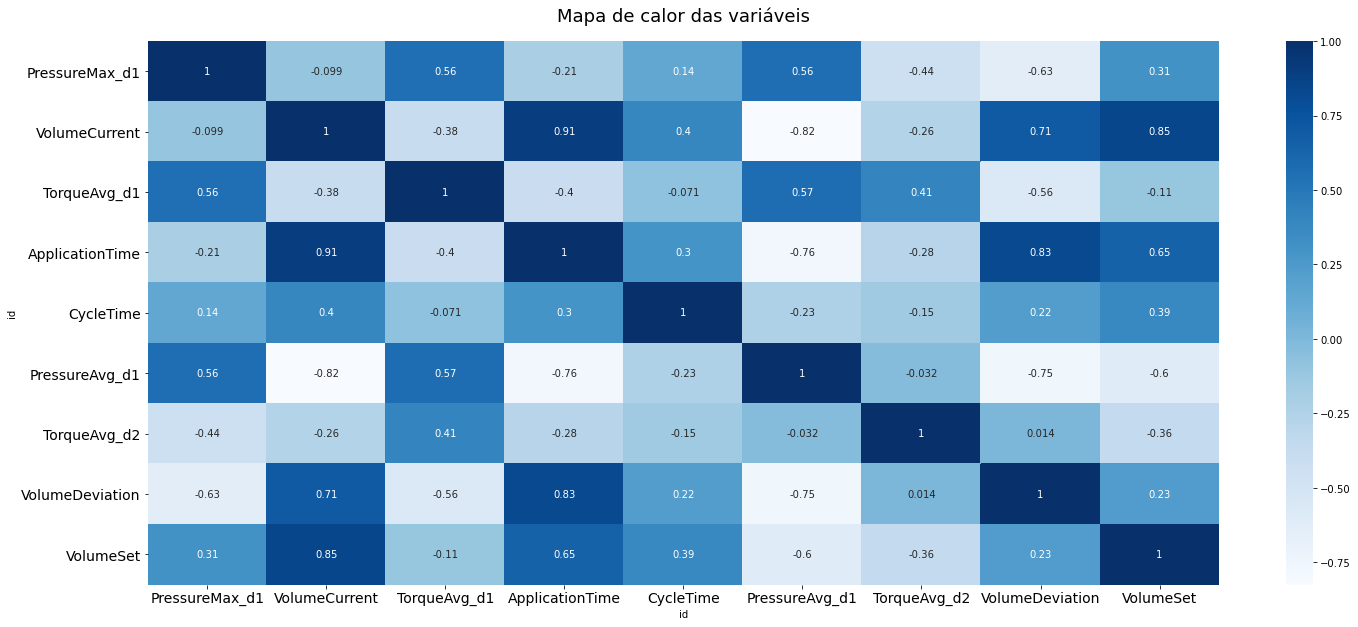

In [7]:
plt.figure(figsize=(24, 10))
plt.title("Mapa de calor das variáveis", fontsize=18, pad=20)
sns.heatmap(X.corr(), annot=True, cmap='Blues');
# sns.set(font_scale=0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig("heatmap.png", bbox_inches='tight', dpi=500)

## Escalonando variaveis

In [8]:
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
scaled

id,PressureMax_d1,VolumeCurrent,TorqueAvg_d1,ApplicationTime,CycleTime,PressureAvg_d1,TorqueAvg_d2,VolumeDeviation,VolumeSet
0,0.547739,0.391688,0.666667,0.998287,0.018596,0.541096,0.619048,0.67625,0.8
1,0.547739,0.391109,0.636364,0.997465,0.018632,0.541096,0.523810,0.67525,0.8
2,0.517588,0.395453,0.606061,0.998287,0.018596,0.513699,0.476190,0.68275,0.8
3,0.507538,0.395164,0.636364,0.998287,0.018605,0.506849,0.619048,0.68225,0.8
4,0.522613,0.397770,0.606061,0.999109,0.018623,0.513699,0.428571,0.68675,0.8
...,...,...,...,...,...,...,...,...,...
9731,0.562814,0.383435,0.621212,0.997465,0.018596,0.554795,0.380952,0.66200,0.8
9732,0.567839,0.384014,0.681818,0.997534,0.018605,0.561644,0.571429,0.66300,0.8
9733,0.603015,0.221402,0.666667,0.482121,0.007443,0.684932,0.523810,0.50965,0.6
9734,0.608040,0.220822,0.651515,0.482052,0.007472,0.684932,0.428571,0.50830,0.6


In [9]:
scaled.head(20)

id,PressureMax_d1,VolumeCurrent,TorqueAvg_d1,ApplicationTime,CycleTime,PressureAvg_d1,TorqueAvg_d2,VolumeDeviation,VolumeSet
0,0.547739,0.391688,0.666667,0.998287,0.018596,0.541096,0.619048,0.67625,0.8
1,0.547739,0.391109,0.636364,0.997465,0.018632,0.541096,0.523810,0.67525,0.8
2,0.517588,0.395453,0.606061,0.998287,0.018596,0.513699,0.476190,0.68275,0.8
3,0.507538,0.395164,0.636364,0.998287,0.018605,0.506849,0.619048,0.68225,0.8
4,0.522613,0.397770,0.606061,0.999109,0.018623,0.513699,0.428571,0.68675,0.8
5,0.547739,0.228787,0.757576,0.482943,0.007392,0.643836,0.857143,0.52665,0.6
6,0.582915,0.223863,0.712121,0.481299,0.007414,0.671233,0.666667,0.51530,0.6
7,0.572864,0.225746,0.727273,0.482874,0.007408,0.664384,0.809524,0.51965,0.6
8,0.582915,0.223863,0.681818,0.482121,0.007428,0.664384,0.571429,0.51530,0.6
9,0.577889,0.224298,0.696970,0.482121,0.007450,0.664384,0.666667,0.51630,0.6


In [10]:
scaled.to_csv('scaled.csv')

In [11]:
scaled.describe()

id,PressureMax_d1,VolumeCurrent,TorqueAvg_d1,ApplicationTime,CycleTime,PressureAvg_d1,TorqueAvg_d2,VolumeDeviation,VolumeSet
count,9736.000000,9736.000000,9736.000000,9736.000000,9736.000000,9736.000000,9736.000000,9736.000000,9736.000000
mean,0.628928,0.314916,0.696257,0.710191,0.015053,0.628168,0.524807,0.565933,0.763250
std,0.083113,0.085720,0.057888,0.220952,0.016439,0.080106,0.156353,0.078774,0.164031
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.582915,0.221836,0.666667,0.482121,0.007399,0.582192,0.428571,0.505000,0.600000
50%,0.643216,0.359542,0.696970,0.772435,0.018596,0.616438,0.476190,0.529625,0.800000
75%,0.673367,0.389227,0.727273,0.996712,0.022946,0.705479,0.523810,0.656250,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
scaled.describe().to_csv('scaled_describe.csv')

## Analise fatorial

In [13]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(scaled)
kmo_model

0.5620202336011593

In [14]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(scaled)
chi_square_value, p_value

(157123.8371270149, 0.0)

In [15]:
stat, p = calculate_bartlett_sphericity(scaled)
p

0.0

In [16]:
fa = FactorAnalyzer(n_factors=9, rotation='varimax')
fa.fit(scaled)

FactorAnalyzer(n_factors=9, rotation='varimax', rotation_kwargs={})

In [17]:
ev, v = fa.get_eigenvalues()
ev

array([4.46129329e+00, 2.10003713e+00, 1.14500901e+00, 7.60618606e-01,
       4.28084433e-01, 6.96877529e-02, 2.53016437e-02, 7.99131193e-03,
       1.97682944e-03])

In [18]:
proportion_variance = [round(value / len(ev), 5) for value in ev]
proportion_variance

[0.4957,
 0.23334,
 0.12722,
 0.08451,
 0.04756,
 0.00774,
 0.00281,
 0.00089,
 0.00022]

In [19]:
concat = pd.DataFrame(ev, X.columns, columns=['eigenvalues'])
concat.T

id,PressureMax_d1,VolumeCurrent,TorqueAvg_d1,ApplicationTime,CycleTime,PressureAvg_d1,TorqueAvg_d2,VolumeDeviation,VolumeSet
eigenvalues,4.461293,2.100037,1.145009,0.760619,0.428084,0.069688,0.025302,0.007991,0.001977


In [20]:
concat['proportion_variance'] = proportion_variance
concat

,eigenvalues,proportion_variance
id,,
PressureMax_d1,4.461293,0.49570
VolumeCurrent,2.100037,0.23334
TorqueAvg_d1,1.145009,0.12722
ApplicationTime,0.760619,0.08451
CycleTime,0.428084,0.04756
PressureAvg_d1,0.069688,0.00774
TorqueAvg_d2,0.025302,0.00281
VolumeDeviation,0.007991,0.00089
VolumeSet,0.001977,0.00022


In [21]:
scaled

id,PressureMax_d1,VolumeCurrent,TorqueAvg_d1,ApplicationTime,CycleTime,PressureAvg_d1,TorqueAvg_d2,VolumeDeviation,VolumeSet
0,0.547739,0.391688,0.666667,0.998287,0.018596,0.541096,0.619048,0.67625,0.8
1,0.547739,0.391109,0.636364,0.997465,0.018632,0.541096,0.523810,0.67525,0.8
2,0.517588,0.395453,0.606061,0.998287,0.018596,0.513699,0.476190,0.68275,0.8
3,0.507538,0.395164,0.636364,0.998287,0.018605,0.506849,0.619048,0.68225,0.8
4,0.522613,0.397770,0.606061,0.999109,0.018623,0.513699,0.428571,0.68675,0.8
...,...,...,...,...,...,...,...,...,...
9731,0.562814,0.383435,0.621212,0.997465,0.018596,0.554795,0.380952,0.66200,0.8
9732,0.567839,0.384014,0.681818,0.997534,0.018605,0.561644,0.571429,0.66300,0.8
9733,0.603015,0.221402,0.666667,0.482121,0.007443,0.684932,0.523810,0.50965,0.6
9734,0.608040,0.220822,0.651515,0.482052,0.007472,0.684932,0.428571,0.50830,0.6


In [22]:
# data = scaled
data = scaled[['PressureMax_d1', 'VolumeCurrent', 'TorqueAvg_d1']]
data['date'] = df.index
data = data[['date', 'PressureMax_d1', 'VolumeCurrent', 'TorqueAvg_d1']]
data.head()

id,date,PressureMax_d1,VolumeCurrent,TorqueAvg_d1
0,2021-03-14 14:34:07,0.547739,0.391688,0.666667
1,2021-03-14 17:02:51,0.547739,0.391109,0.636364
2,2021-03-14 17:03:50,0.517588,0.395453,0.606061
3,2021-03-14 17:04:58,0.507538,0.395164,0.636364
4,2021-03-14 17:15:11,0.522613,0.397770,0.606061


# Falha

In [23]:
fault = data.copy()

In [24]:
s = datetime.datetime(2021, 3, 27, 3, 4, 0)
e = datetime.datetime(2021, 3, 27, 3, 53, 0)
fault['target'] = [ 1 if s < value < e else 0 for value in data.date]
fault

id,date,PressureMax_d1,VolumeCurrent,TorqueAvg_d1,target
0,2021-03-14 14:34:07,0.547739,0.391688,0.666667,0
1,2021-03-14 17:02:51,0.547739,0.391109,0.636364,0
2,2021-03-14 17:03:50,0.517588,0.395453,0.606061,0
3,2021-03-14 17:04:58,0.507538,0.395164,0.636364,0
4,2021-03-14 17:15:11,0.522613,0.397770,0.606061,0
...,...,...,...,...,...
9731,2021-04-01 12:42:00,0.562814,0.383435,0.621212,0
9732,2021-04-01 12:42:59,0.567839,0.384014,0.681818,0
9733,2021-04-01 12:43:33,0.603015,0.221402,0.666667,0
9734,2021-04-01 12:44:31,0.608040,0.220822,0.651515,0


In [25]:
fault.query('target == 1')

id,date,PressureMax_d1,VolumeCurrent,TorqueAvg_d1,target
6559,2021-03-27 03:10:21,0.974874,0.036780,0.863636,1
6560,2021-03-27 03:12:12,0.974874,0.000000,0.863636,1
6561,2021-03-27 03:24:30,0.974874,0.074283,0.878788,1
6562,2021-03-27 03:49:32,0.949749,1.000000,0.681818,1
6563,2021-03-27 03:52:45,0.949749,0.000000,0.681818,1


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

## X e y

In [27]:
X = fault.drop(['date', 'target'], axis=1)
y = fault.target

In [28]:
X

id,PressureMax_d1,VolumeCurrent,TorqueAvg_d1
0,0.547739,0.391688,0.666667
1,0.547739,0.391109,0.636364
2,0.517588,0.395453,0.606061
3,0.507538,0.395164,0.636364
4,0.522613,0.397770,0.606061
...,...,...,...
9731,0.562814,0.383435,0.621212
9732,0.567839,0.384014,0.681818
9733,0.603015,0.221402,0.666667
9734,0.608040,0.220822,0.651515


In [29]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9731    0
9732    0
9733    0
9734    0
9735    0
Name: target, Length: 9736, dtype: int64

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [31]:
metodo = []
score = []
roc_auc_score_list = []
acuracia_list = []
cross_val_score_mean = []

## SVC

In [32]:
from sklearn.svm import SVC

In [33]:
svc = SVC(probability=True)
# svc = SVC(kernel='linear', probability=True)
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

In [34]:
df_svc = pd.DataFrame()
df_svc['y_test'] = y_test
df_svc['y_pred'] = svc_pred
df_svc['residuo'] = y_test - svc_pred
df_svc.head()

,y_test,y_pred,residuo
4845,0,0,0
3804,0,0,0
685,0,0,0
7609,0,0,0
2718,0,0,0


In [35]:
df_svc.query('y_test == 1')

,y_test,y_pred,residuo
6560,1,0,1
6562,1,0,1
6559,1,0,1


In [36]:
svc_score = svc.score(X_test, y_test)
svc_score

0.9989729544676481

In [37]:
roc_svc = roc_auc_score(y_test, svc_pred)
roc_svc

0.5

In [38]:
acuracia = accuracy_score(y_test, svc_pred)
# acuracia = round(acuracia, 3)*100
print(acuracia)
print(classification_report(y_test, svc_pred))

0.9989729544676481
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2918
           1       0.00      0.00      0.00         3

    accuracy                           1.00      2921
   macro avg       0.50      0.50      0.50      2921
weighted avg       1.00      1.00      1.00      2921



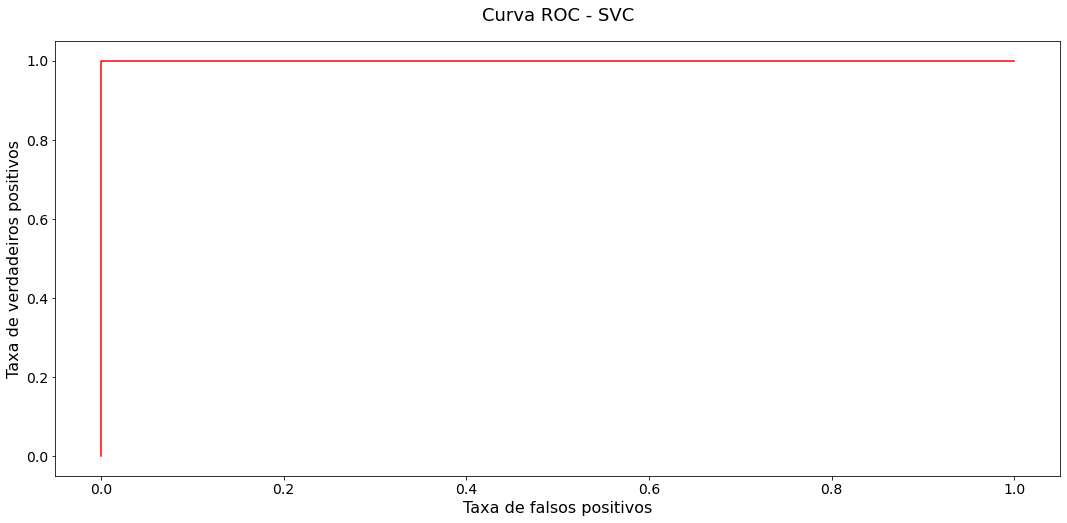

In [39]:
prob_pred = svc.predict_proba(X_test)[:,1]
fpr_svc, tpr_svc, _ = roc_curve(y_test, prob_pred)

plt.figure(figsize=(18, 8))
plt.title('Curva ROC - SVC', fontsize=18, pad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Taxa de falsos positivos', fontsize=16)
plt.ylabel('Taxa de verdadeiros positivos', fontsize=16)
plt.plot(fpr_svc, tpr_svc, color='r');
plt.savefig('roc_svc', bbox_inches='tight', dpi=300)

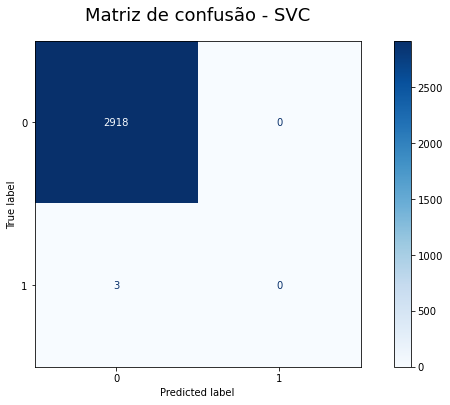

In [40]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Matriz de confusão - SVC', fontsize=18, pad=20)
plot_confusion_matrix(svc, X_test, y_test, cmap='Blues', values_format = '.5g', ax=ax);
plt.savefig('mc_svc', bbox_inches='tight', dpi=300)

In [41]:
scores = cross_val_score(svc, X_train, y_train, cv=10)
scores.mean()

0.9997067448680351

In [42]:
metodo.append('SVC')
score.append(svc_score)
roc_auc_score_list.append(roc_svc)
acuracia_list.append(acuracia)
cross_val_score_mean.append(scores.mean())

## DTC

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [44]:
dtc = DecisionTreeClassifier(random_state=1)
dtc.fit(X_train, y_train)
dtc_pred = dtc.predict(X_test)

In [45]:
df_dtc = pd.DataFrame()
df_dtc['y_test'] = y_test
df_dtc['y_pred'] = dtc_pred
df_dtc['residuo'] = y_test - dtc_pred
df_dtc.head()

,y_test,y_pred,residuo
4845,0,0,0
3804,0,0,0
685,0,0,0
7609,0,0,0
2718,0,0,0


In [46]:
df_dtc.query('y_test == 1')

,y_test,y_pred,residuo
6560,1,1,0
6562,1,0,1
6559,1,1,0


In [47]:
dtc_score = dtc.score(X_test, y_test)
dtc_score

0.9993153029784321

In [48]:
roc_dtc = roc_auc_score(y_test, dtc_pred)
roc_dtc

0.8331619830934429

In [49]:
acuracia = accuracy_score(y_test, dtc_pred)
# acuracia = round(acuracia, 3)*100
print(acuracia)
print(classification_report(y_test, dtc_pred))

0.9993153029784321
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2918
           1       0.67      0.67      0.67         3

    accuracy                           1.00      2921
   macro avg       0.83      0.83      0.83      2921
weighted avg       1.00      1.00      1.00      2921



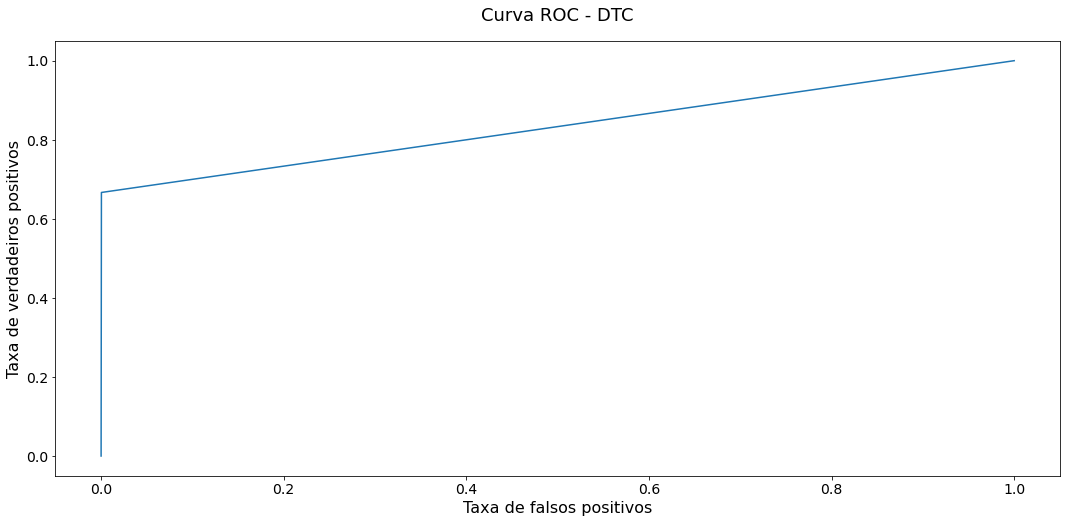

In [50]:
prob_pred = dtc.predict_proba(X_test)[:,1]
fpr_dtc, tpr_dtc, _ = roc_curve(y_test, prob_pred)

plt.figure(figsize=(18, 8))
plt.title('Curva ROC - DTC', fontsize=18, pad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Taxa de falsos positivos', fontsize=16)
plt.ylabel('Taxa de verdadeiros positivos', fontsize=16)
plt.plot(fpr_dtc, tpr_dtc);
plt.savefig('roc_dtc', bbox_inches='tight', dpi=300)

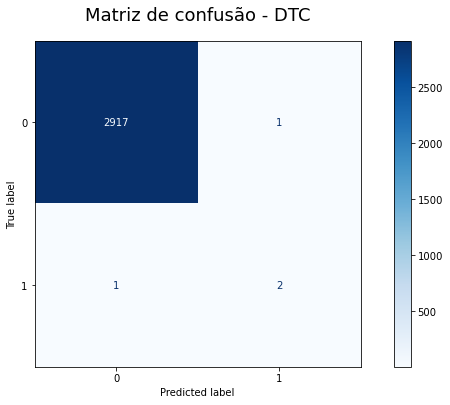

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Matriz de confusão - DTC', fontsize=18, pad=20)
plot_confusion_matrix(dtc, X_test, y_test, cmap='Blues', values_format = '.5g', ax=ax);
plt.savefig('mc_dtc', bbox_inches='tight', dpi=300)

In [52]:
scores = cross_val_score(dtc, X_train, y_train, cv=10)
scores.mean()

0.9997067448680351

In [53]:
metodo.append('DTC')
score.append(dtc_score)
roc_auc_score_list.append(roc_dtc)
acuracia_list.append(acuracia)
cross_val_score_mean.append(scores.mean())

## Naive Bayes classifier

In [54]:
from sklearn.naive_bayes import MultinomialNB

In [55]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)
mnb_pred = mnb.predict(X_test)

In [56]:
mnb_score = mnb.score(X_test, y_test)
mnb_score

0.9989729544676481

In [57]:
roc_mnb = roc_auc_score(y_test, mnb_pred)
roc_mnb

0.5

In [58]:
acuracia = accuracy_score(y_test, mnb_pred)
# acuracia = round(acuracia, 3)*100
print(acuracia)
print(classification_report(y_test, mnb_pred))

0.9989729544676481
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2918
           1       0.00      0.00      0.00         3

    accuracy                           1.00      2921
   macro avg       0.50      0.50      0.50      2921
weighted avg       1.00      1.00      1.00      2921



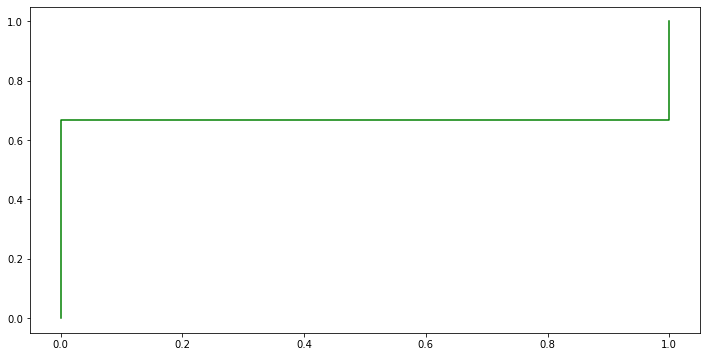

In [59]:
prob_pred = mnb.predict_proba(X_test)[:,1]
fpr_mnb, tpr_mnb, _ = roc_curve(y_test, prob_pred)

plt.figure(figsize=(12, 6))
plt.plot(fpr_mnb, tpr_mnb, color='g');

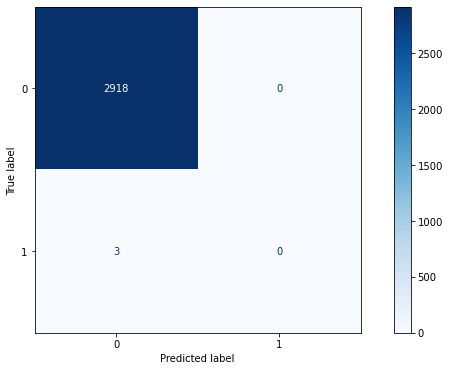

In [60]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_confusion_matrix(mnb, X_test, y_test, cmap='Blues', values_format = '.5g', ax=ax);

In [61]:
scores = cross_val_score(mnb, X_train, y_train, cv=5)
scores.mean()

0.9997065297138665

In [62]:
metodo.append('MNB')
score.append(mnb_score)
roc_auc_score_list.append(roc_mnb)
acuracia_list.append(acuracia)
cross_val_score_mean.append(scores.mean())

## random forest classifier

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc = RandomForestClassifier(max_depth=3, random_state=1)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [65]:
rfc_score = rfc.score(X_test, y_test)
rfc_score

0.9993153029784321

In [66]:
roc_rfc = roc_auc_score(y_test, rfc_pred)
roc_rfc

0.8331619830934429

In [67]:
acuracia = accuracy_score(y_test, rfc_pred)
# acuracia = round(acuracia, 3)*100
print(acuracia)
print(classification_report(y_test, rfc_pred))

0.9993153029784321
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2918
           1       0.67      0.67      0.67         3

    accuracy                           1.00      2921
   macro avg       0.83      0.83      0.83      2921
weighted avg       1.00      1.00      1.00      2921



In [68]:
df_rfc = pd.DataFrame()
df_rfc['y_test'] = y_test
df_rfc['y_pred'] = rfc_pred
df_rfc['residuo'] = y_test - rfc_pred
df_rfc.head()

,y_test,y_pred,residuo
4845,0,0,0
3804,0,0,0
685,0,0,0
7609,0,0,0
2718,0,0,0


In [69]:
df_rfc.query('y_test == 1')

,y_test,y_pred,residuo
6560,1,1,0
6562,1,0,1
6559,1,1,0


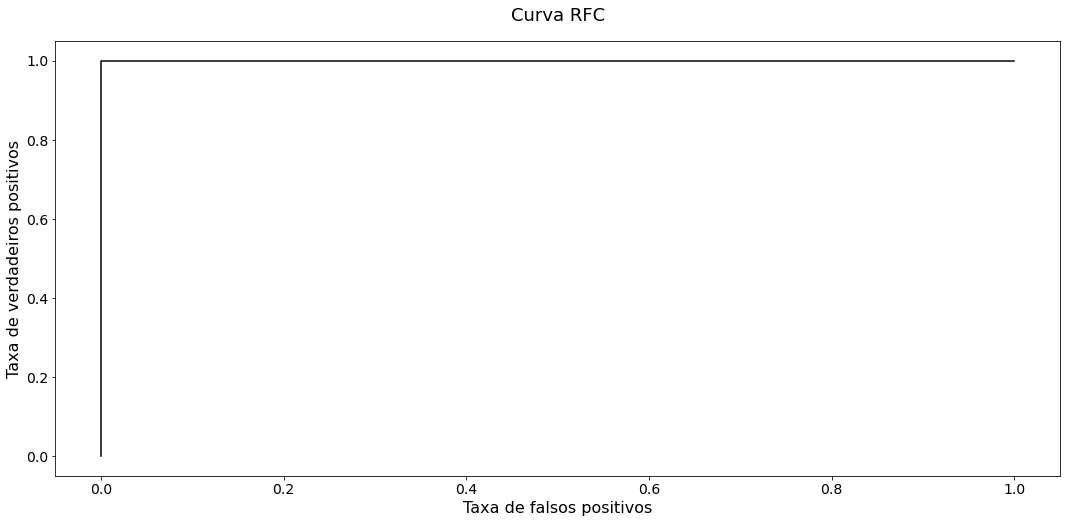

In [70]:
prob_pred = rfc.predict_proba(X_test)[:,1]
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, prob_pred)

plt.figure(figsize=(18, 8))
plt.title('Curva RFC', fontsize=18, pad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Taxa de falsos positivos', fontsize=16)
plt.ylabel('Taxa de verdadeiros positivos', fontsize=16)
plt.plot(fpr_rfc, tpr_rfc, color='k');
plt.savefig('rocdrfc', bbox_inches='tight', dpi=300)

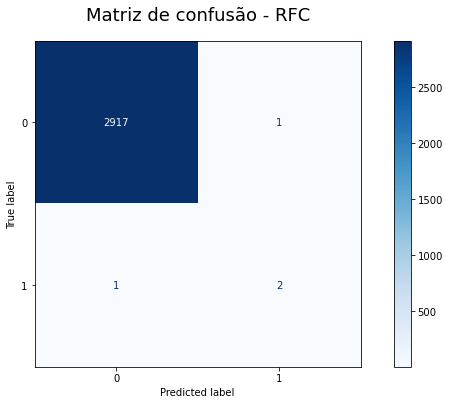

In [71]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Matriz de confusão - RFC', fontsize=18, pad=20)
plot_confusion_matrix(rfc, X_test, y_test, cmap='Blues', values_format = '.5g', ax=ax);
plt.savefig('mc_rfc', bbox_inches='tight', dpi=300)

In [72]:
scores = cross_val_score(rfc, X_train, y_train, cv=5)
scores.mean()

0.9997065297138665

In [73]:
metodo.append('RFC')
score.append(rfc_score)
roc_auc_score_list.append(roc_rfc)
acuracia_list.append(acuracia)
cross_val_score_mean.append(scores.mean())

## AdaBoost classifier

In [74]:
from sklearn.ensemble import AdaBoostClassifier

In [75]:
abc = AdaBoostClassifier(n_estimators=50, random_state=1)
abc.fit(X_train, y_train)
abc_pred = abc.predict(X_test)

In [76]:
abc_score = abc.score(X_test, y_test)
abc_score

0.9993153029784321

In [77]:
roc_abc = roc_auc_score(y_test, abc_pred)
roc_abc

0.8331619830934429

In [78]:
acuracia = accuracy_score(y_test, abc_pred)
# acuracia = round(acuracia, 3)*100
print(acuracia)
print(classification_report(y_test, abc_pred))

0.9993153029784321
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2918
           1       0.67      0.67      0.67         3

    accuracy                           1.00      2921
   macro avg       0.83      0.83      0.83      2921
weighted avg       1.00      1.00      1.00      2921



In [79]:
df_abc = pd.DataFrame()
df_abc['y_test'] = y_test
df_abc['y_pred'] = abc_pred
df_abc['residuo'] = y_test - abc_pred
df_abc.head()

,y_test,y_pred,residuo
4845,0,0,0
3804,0,0,0
685,0,0,0
7609,0,0,0
2718,0,0,0


In [80]:
df_abc.query('y_test == 1')

,y_test,y_pred,residuo
6560,1,1,0
6562,1,0,1
6559,1,1,0


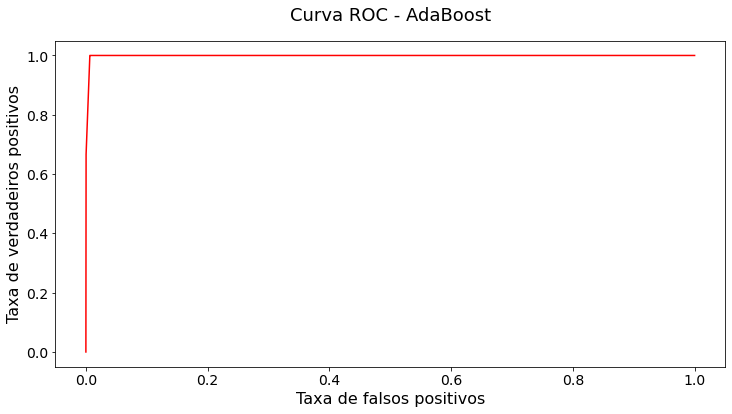

In [81]:
prob_pred = abc.predict_proba(X_test)[:,1]
fpr_abc, tpr_abc, _ = roc_curve(y_test, prob_pred)

plt.figure(figsize=(12, 6))
plt.title('Curva ROC - AdaBoost', fontsize=18, pad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Taxa de falsos positivos', fontsize=16)
plt.ylabel('Taxa de verdadeiros positivos', fontsize=16)
plt.plot(fpr_abc, tpr_abc, color='r');
plt.savefig('roc_ada', bbox_inches='tight', dpi=300)

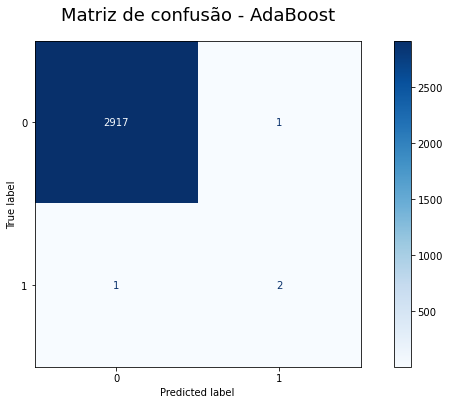

In [82]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.title('Matriz de confusão - AdaBoost', fontsize=18, pad=20)
plot_confusion_matrix(abc, X_test, y_test, cmap='Blues', values_format = '.5g', ax=ax);
plt.savefig('mc_ada', bbox_inches='tight', dpi=300)

In [83]:
scores = cross_val_score(abc, X_train, y_train, cv=10)
scores.mean()

0.9997067448680351

In [84]:
metodo.append('ABC')
score.append(abc_score)
roc_auc_score_list.append(roc_abc)
acuracia_list.append(acuracia)
cross_val_score_mean.append(scores.mean())

## Gradient Boosting for classification

In [85]:
from sklearn.ensemble import GradientBoostingClassifier

In [86]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=1.0,
                                    max_depth=3, random_state=1)
gbc.fit(X_train, y_train)
gbc_pred = gbc.predict(X_test)

In [87]:
gbc_score = gbc.score(X_test, y_test)
gbc_score

0.9993153029784321

In [88]:
roc_gbc = roc_auc_score(y_test, gbc_pred)
roc_gbc

0.8331619830934429

## acuracia

In [89]:
acuracia = accuracy_score(y_test, gbc_pred)
# acuracia = round(acuracia, 3)*100
acuracia

0.9993153029784321

## classification report

In [90]:
print(classification_report(y_test, gbc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2918
           1       0.67      0.67      0.67         3

    accuracy                           1.00      2921
   macro avg       0.83      0.83      0.83      2921
weighted avg       1.00      1.00      1.00      2921



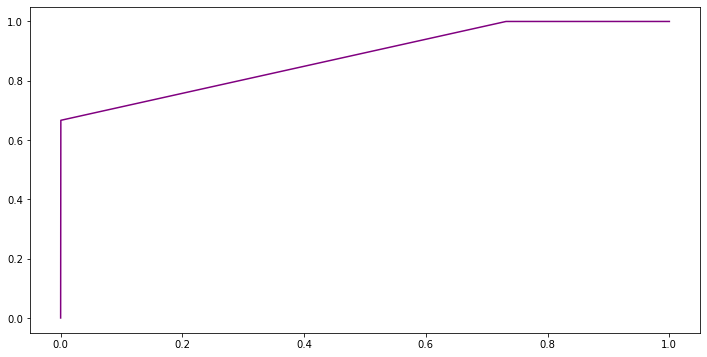

In [91]:
prob_pred = gbc.predict_proba(X_test)[:,1]
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, prob_pred)

plt.figure(figsize=(12, 6))
plt.plot(fpr_gbc, tpr_gbc, color='purple');

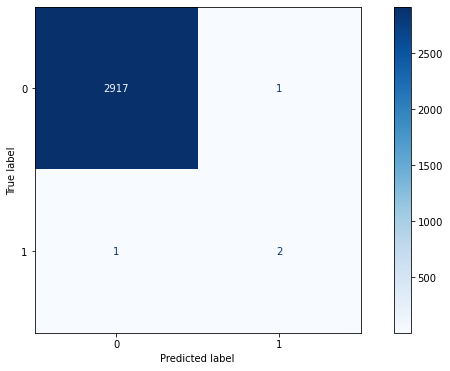

In [92]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_confusion_matrix(gbc, X_test, y_test, cmap='Blues', values_format = '.5g', ax=ax);

In [93]:
scores = cross_val_score(gbc, X_train, y_train, cv=5)
scores.mean()

0.9997065297138665

In [94]:
metodo.append('GBC')
score.append(gbc_score)
roc_auc_score_list.append(roc_gbc)
acuracia_list.append(acuracia)
cross_val_score_mean.append(scores.mean())

## Curva ROC para todas as tecnicas

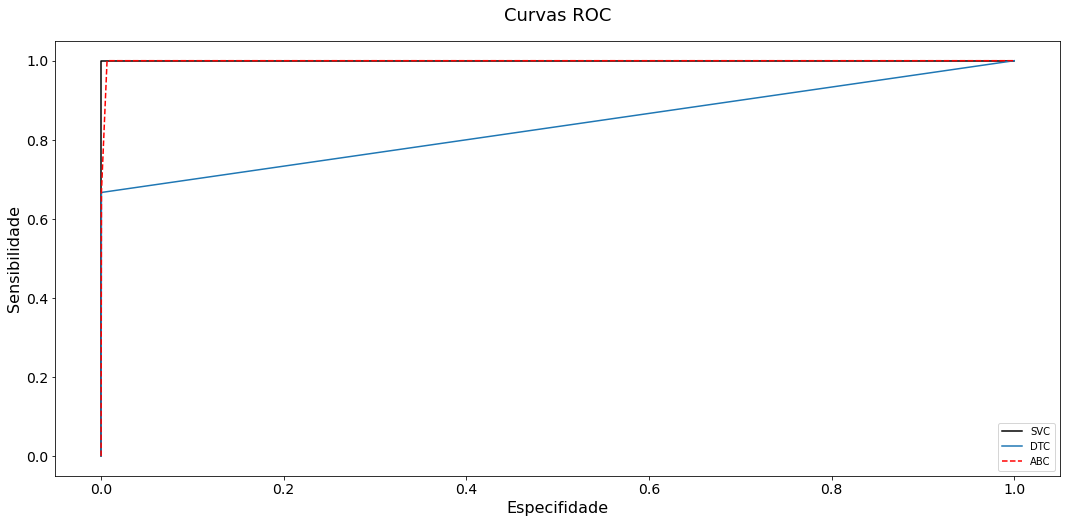

In [95]:
plt.figure(figsize=(18, 8))
plt.title('Curvas ROC', fontsize=18, pad=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.plot(fpr_svc, tpr_svc, color='k', label='SVC')
plt.plot(fpr_dtc, tpr_dtc, label='DTC')
# plt.plot(fpr_mnb, tpr_mnb, color='g', label='mnb')
# plt.plot(fpr_rfc, tpr_rfc, color='r', label='RFC')
plt.plot(fpr_abc, tpr_abc, color='r', label='ABC', ls="--")
# plt.plot(fpr_gbc, tpr_gbc, color='purple', label='gbc')
plt.legend()
plt.xlabel('Especifidade', fontsize=16)
plt.ylabel('Sensibilidade', fontsize=16);
# plt.plot([0, 1], ls="--", c = 'k') #plotando linha guia pontilhada vermelha
# plt.plot([0, 0], [1, 0], ls="--", c = 'k'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.savefig('roc.jpeg', bbox_inches='tight', dpi=300)

In [96]:
df_score = pd.DataFrame(columns=['metodo', 'score', 'roc_auc_score', 'acuracia', 'cross_val_score_mean'])
df_score['metodo'] = metodo
df_score['score'] = score
df_score['roc_auc_score'] = roc_auc_score_list
df_score['acuracia'] = acuracia_list
df_score['cross_val_score_mean'] = cross_val_score_mean
df_score

,metodo,score,roc_auc_score,acuracia,cross_val_score_mean
0,SVC,0.998973,0.500000,0.998973,0.999707
1,DTC,0.999315,0.833162,0.999315,0.999707
2,MNB,0.998973,0.500000,0.998973,0.999707
3,RFC,0.999315,0.833162,0.999315,0.999707
4,ABC,0.999315,0.833162,0.999315,0.999707
5,GBC,0.999315,0.833162,0.999315,0.999707


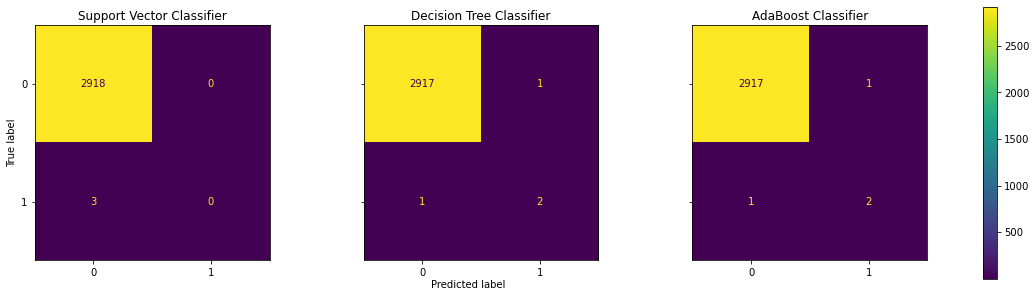

In [97]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

classifiers = {
    "Support Vector Classifier": svc,
    "Decision Tree Classifier": dtc,
    "AdaBoost Classifier": abc,
}

f, axes = plt.subplots(1, 3, figsize=(20, 5), sharey='row')

for i, (key, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.fit(X_train, y_train).predict(X_test)
    cf_matrix = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cf_matrix)
    disp.plot(ax=axes[i])
    disp.ax_.set_title(key)
    disp.im_.colorbar.remove()
    disp.ax_.set_xlabel('')
    if i!=0:
        disp.ax_.set_ylabel('')

f.text(0.4, 0.1, 'Predicted label', ha='left')
plt.subplots_adjust(wspace=0.40, hspace=0.1)

f.colorbar(disp.im_, ax=axes)
plt.savefig('compare_mc.jpeg', bbox_inches='tight', dpi=300);